In [589]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Coordinate descent

In [590]:
x1=0
x2=3
n_iter=6
x1a=np.array([x1])
x2a=np.array([x2])
def obj(x1,x2):
    return (x1-2)**4+(x1-2*x2)**2
def obj2(x2,x1):
    return (x1-2)**4+(x1-2*x2)**2
for i in range(n_iter):
    if i%2==0:
        ff=minimize(obj,0,(x2,))
        x1=ff.x[0]
#        x1a=np.append(x1a,x1)
#        x2a=np.append(x2a,x2)
        print(obj(x1,x2))
    else:
        gg=minimize(obj2,x2,(x1,))
        x2=gg.x[0]
        x1a=np.append(x1a,x1)
        x2a=np.append(x2a,x2)
        print(obj(x1,x2))

9.867344782301663
1.6199595781585714
0.40570572514442516
0.15696205401229987
0.07319842620266738
0.040543598525278605


In [591]:
x1c=x1a
x2c=x2a

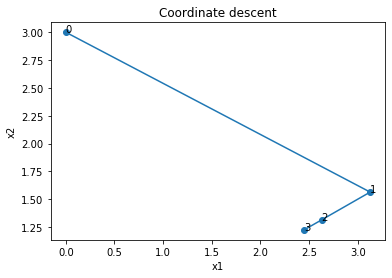

In [592]:
plt.plot(x1a,x2a,'-o')
for i in range(len(x1a)):
    plt.text(x1a[i],x2a[i],i)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Coordinate descent')
plt.show()

# Steepest Descent

In [593]:
x0=np.array([0,3])

def objective(x):
    x1,x2=x
    return (x1-2)**4+(x1-2*x2)**2

def dx1(x):
    x1,x2=x
    return 4*(x1-2)**3+2*(x1-2*x2)

def dx2(x):
    x1,x2=x
    return 2*(-2)*(x1-2*x2)

In [594]:
#Steepest descent
d1=dx1(x0)
d2=dx2(x0)
def f(h,x0):
    x1,x2=x0
    x11=x1-h*dx1(x0)
    x21=x2-h*dx2(x0)
    obj=objective(np.array([x11,x21]))
    return obj

In [595]:
res=minimize(f,0,tol=1e-6,args=(np.array([2.70753302,1.52316381])))
h_opt=res.x
h_opt

array([0.23077616])

# Steepest Descent

In [596]:
def steep(n_iter,x0):
    x1i,x2i=x0
    xo=np.array([x1i,x2i])
    xo=np.reshape(xo,(2,1))
    t=0.01
    for i in range(n_iter):
        a=np.array([x1i,x2i])
        print(a)
        der1=dx1(a) #derivative1
        der2=dx2(a) #derivate2
        print(der1,der2)
        res=minimize(f,0.01,args=(a)) #f is the objective
        print(res)
        x1i=x1i-res.x*der1
        x2i=x2i-res.x*der2
        print(x1i,x2i)
        temp=np.array([x1i,x2i])
        xo=np.column_stack([xo,temp])
        t=res.x
    return xo

In [597]:
xsol=steep(3,x0)
sol=objective(xsol)

[0 3]
-44 24
      fun: 0.3653851152616442
 hess_inv: array([[3.50248846e-05]])
      jac: array([4.06056643e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([0.06153484])
[2.70753302] [1.52316381]
[[2.70753302]
 [1.52316381]]
[0.73918337] [1.35517836]
      fun: 0.09660435541475058
 hess_inv: array([[0.10368521]])
      jac: array([-5.96605241e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.23077555])
[2.53694757] [1.21042177]
[[2.53694757]
 [1.21042177]]
[0.85144326] [-0.4644161]
      fun: 0.04496029688065283
 hess_inv: array([[0.12476638]])
      jac: array([-6.22542575e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.11159093])
[2.44193423] [1.2622464]


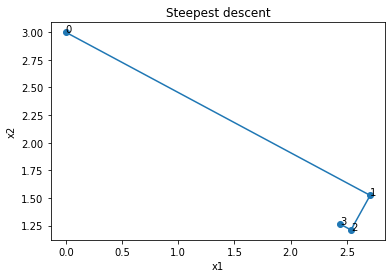

In [598]:
x1s=xsol[0,:]
x2s=xsol[1,:]
for i in range(len(x1s)):
    plt.text(x1s[i],x2s[i],i)
plt.plot(x1s,x2s,'-o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Steepest descent')
plt.show()

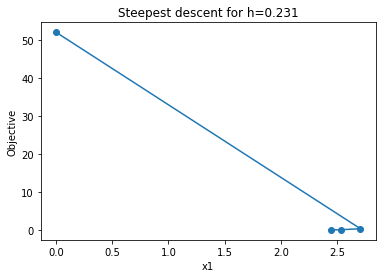

0.04496029688065283


In [599]:
plt.plot(x1s,sol,'-o')
plt.xlabel('x1')
plt.ylabel('Objective')
plt.title(f'Steepest descent for h={h_opt[0]:1.3f}')
plt.show()
print(sol[-1])

# Newton's Method

In [600]:
x10=0
x20=3

In [601]:
def objective(x1,x2):
    return (x1-2)**4+(x1-2*x2)**2

def dx1(x1,x2):
    return 4*(x1-2)**3+2*(x1-2*x2)

def dx2(x1,x2):
    return 2*(-2)*(x1-2*x2)

In [602]:
def dx11(x1,x2):
    return 12*(x1-2)**2+2
dx12=-4
dx22=8

In [603]:
def der(x1,x2):
    u=np.array([dx1(x1,x2),dx2(x1,x2)])
    u=np.reshape(u,(2,1))
    return u.T

def hess(x1,x2):
    p=np.array([[(12*(x1-2)**2+2),-4],[-4,8]])
    return np.linalg.inv(p)

In [604]:
l=1
-1*l*hess(x10,x20)@der(x10,x20).T

array([[ 0.66666667],
       [-2.66666667]])

# Newton's Method

In [605]:
x10=0
x20=3
x1a=np.array([x10])
x2a=np.array([x20])
o=np.array([objective(x10,x20)])
for i in range(3):
    dx=-1*l*(hess(x10,x20))@der(x10,x20).T
    x10=x10+dx[0][0]
    x20=x20+dx[1][0]
    x1a=np.append(x1a,x10)
    x2a=np.append(x2a,x20)
    o=np.append(o,objective(x10,x20))

In [606]:
x1n=x1a
x2n=x2a

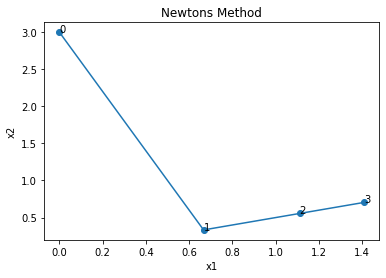

In [607]:
for i in range(len(x1a)):
    plt.text(x1a[i],x2a[i],i)
plt.plot(x1a,x2a,'-o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Newtons Method')
plt.show()

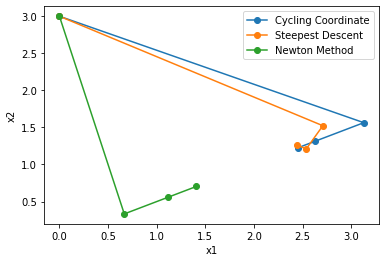

In [608]:
plt.plot(x1c,x2c,'-o',label='Cycling Coordinate')
plt.plot(x1s,x2s,'-o',label='Steepest Descent')
plt.plot(x1n,x2n,'-o',label='Newton Method')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

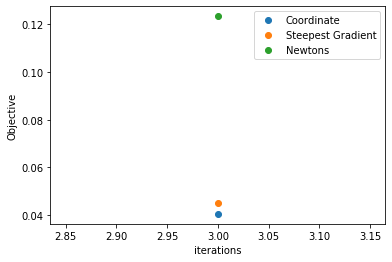

In [609]:
it=np.array([3,3,3])
o=np.array([objective(x1c,x2c)[-1],objective(x1s,x2s)[-1],objective(x1n,x2n)[-1]])
labels=['Coordinate','Steepest Gradient','Newtons']
for i in range(len(o)):
    plt.plot(it[i],o[i],'o',label=labels[i])
plt.legend()    
plt.xlabel('iterations')
plt.ylabel('Objective')
plt.show()

In [610]:
print(o)

[0.0405436  0.0449603  0.12331755]


In [613]:
x1n,x2n

(array([0.        , 0.66666667, 1.11111111, 1.40740741]),
 array([3.        , 0.33333333, 0.55555556, 0.7037037 ]))